# Estatística Computacional - SME0806 - 1º Trabalho 

*** 

**Heitor Carvalho Pinheiro** - 11833351

**Isabelle Marques do Amaral** - 11398478

**Luca Curcio** - 10295502

***

In [32]:
#importando bibliotecas

import numpy as np
from scipy.stats import uniform
import seaborn as sns

## 1.

a) Considere o cálculo da integral

 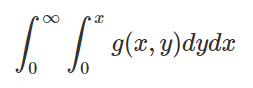


Vamos definir a mudança de variável para x da seguinte forma:

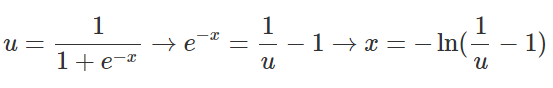

Definimos a nova variável u, e também expressamos x em função de u.

Para a variável y, vamos apenas fazer uma mudança da forma:

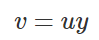

Portanto, temos o seguinte

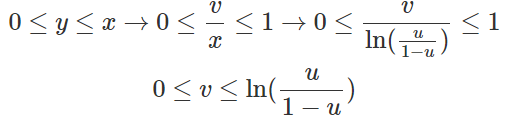

Agora sabemos a variação de ambas as variáveis novas, como u é a função sigmoide, faz o mapeamento de x que varia entre 0 e infinito para o intervalo [0,1], enquanto a nova variável v tem variação no intervalo [0, ln(u/1-u)]

O jacobiano da nossa transformação é dado por :

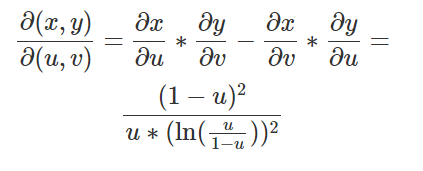

Agora podemos reescrever a integral original da seguinte maneira

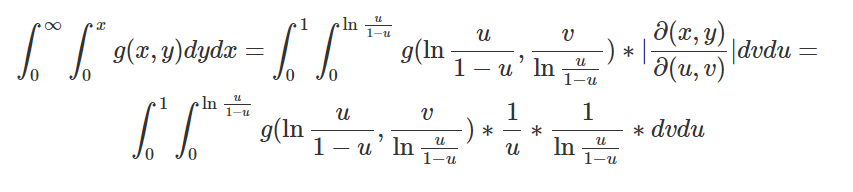

--------------------
Apresente aproximações de Monte Carlo para a integral em (1) para cada uma das funções abaixo. Compare sua aproximação com o valor exato, se for possível.

Podemos aproximar integrais duplas com a seguinte fómula

$$
(b-a)(d-c) / N \cdot \sum{f(x, y)} \approx \int_{a}^{b}\int_{c}^{d} f(x,y)dxdy
$$


### b) $g(x) = \int_{0}^{1}\int_{0}^{1} e^{-(x+y)}dxdy$

In [33]:
def expfunc01(x, y):
    return np.e**(-x-y)

def integralExample1(N):

    X = uniform.rvs(size=N) 
    Y = uniform.rvs(size=N) 

    integral = 0.

    for i in range(N):
        integral += expfunc01(X[i], Y[i]) 

    area = 1/N*integral 

    return area

In [34]:
integralExample1(1000)

0.39744378734063895

Logo, $\int_{0}^{1}\int_{0}^{1} e^{-(x+y)}dxdy \approx  0.39$

### c) $\int_{0}^{1}\int_{0}^{1} e^{-(x^2+y^2)}dxdy$

In [35]:
def expfunc02(x, y):
    return np.e**(-x**2-y**2)

def integralExample2(N):

    X = uniform.rvs(size=N) 
    Y = uniform.rvs(size=N) 

    integral = 0.

    for i in range(N):
        integral += expfunc02(X[i], Y[i]) 

    area = 1/N*integral 

    return area

In [36]:
integralExample2(N=10000)

0.5573948239385529

Logo, $\int_{0}^{1}\int_{0}^{1} e^{-(x^2+y^2)}dxdy \approx 0.55$

### d) $\int_{0}^{1}\int_{0}^{1} e^{-(x+y)^2}dxdy$ 

In [37]:
def expfunc03(x, y):
    return np.e**(-x-y)**2

def integralExample3(N):

    X = uniform.rvs(size=N) 
    Y = uniform.rvs(size=N) 

    integral = 0.

    for i in range(N):
        integral += expfunc03(X[i], Y[i]) 

    area = 1/N*integral 

    return area

In [38]:
integralExample3(10000)

4.848510285546089

Logo, $\int_{0}^{1}\int_{0}^{1} e^{-(x+y)^2}dxdy \approx 4.9$ 

### 2. A variável aleatória $X$ tem função densidade $f(x) \propto e^{(-|x|^3/3)}$ 

Vamos definir um gerador de amostras de $X$ utilizando o Método da Rejeição.

### Visualizando $f(x)$

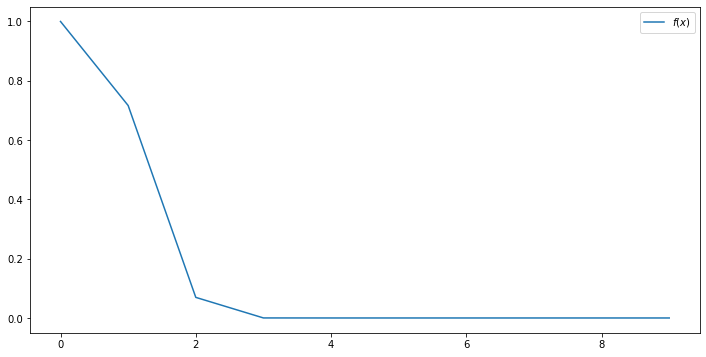

In [39]:
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 

def f(x):
    return np.exp(-abs(x)**3/3) 

x = np.arange(0, 10) 

fig, ax = plt.subplots(figsize=(12,6)) 
ax.plot(x, f(x),label="$f(x)$") 
plt.legend() 
plt.show()

### Definindo a função auxiliar $q(x)$

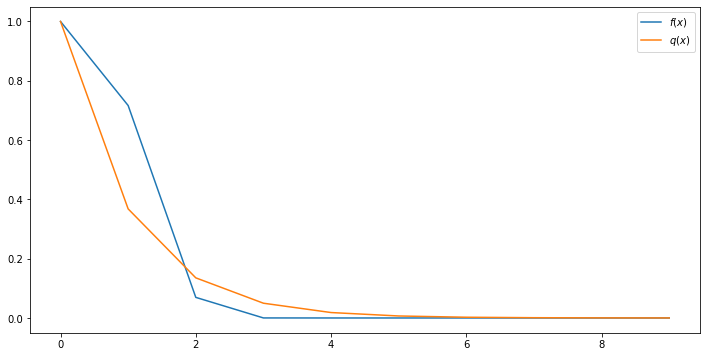

In [40]:
def q(x):
    return np.exp(-x)

fig, ax = plt.subplots(figsize=(12,6)) 
ax.plot(x, f(x),label="$f(x)$") 
ax.plot(x, q(x),label="$q(x)$") 
plt.legend() 
plt.show()

Definindo $M$ de modo que $M \cdot q(x) \geq f(x)$

Ou seja, vamos "encapsular" a $f(x)$ com a $q(x)$

In [41]:
M = max(f(x) / q(x))

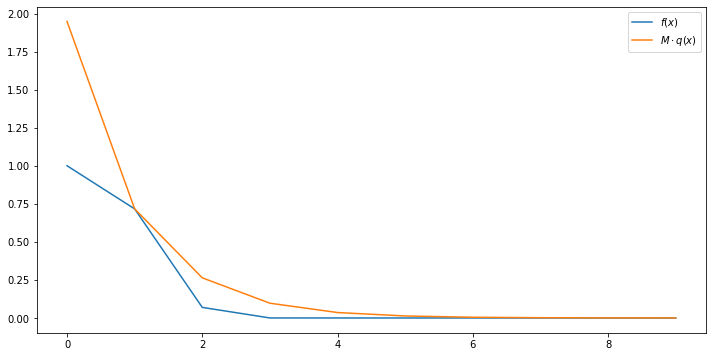

In [42]:
fig, ax = plt.subplots(figsize=(12,6)) 
ax.plot(x, f(x),label="$f(x)$") 
ax.plot(x, q(x)*M,label="$M \cdot q(x)$") 
plt.legend() 
plt.show()

### Definindo o nosso gerador de amostras aleatórias. 

Para construir o nosso gerador precisamos:

1. Amostrar $N$ elementos de $q(x)$
2. Amostrar $N$ elementos de $U(0,1)$ 
3. Definir a regra de aceitação de modo que 

$$
u \leq f(x)/M \cdot q(x)
$$

4. Aceitar as amostras que atenderem a regra acima.

In [43]:
def sampler(N): 
    
    u_samples = np.random.uniform(0,1, size=N) 
    q_samples = np.random.exponential(scale=1,size=N)

    mask = (f(q_samples) / (M*q(q_samples))) > u_samples 
    return q_samples[mask]

Para um tamanho de amostra $N = 500$

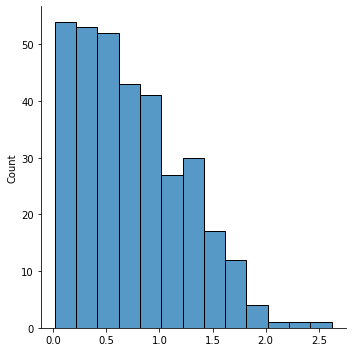

In [44]:
samples = sampler(500) 
sns.displot(samples) 
plt.show()

Para $N = 1000$

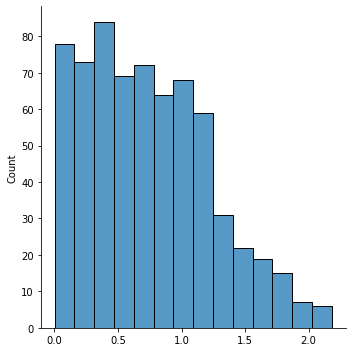

In [45]:
samples = sampler(1000) 
sns.displot(samples) 
plt.show()

Para $N = 100000$

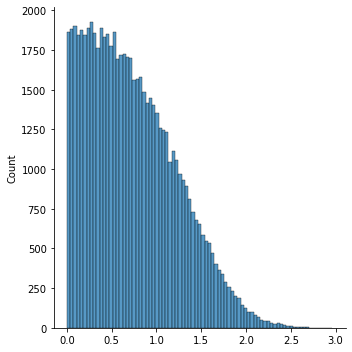

In [46]:
samples = sampler(100000) 
sns.displot(samples) 
plt.show()

2. b) Apresente uma aproximação de Monte Carlo para E(X²)

Vamos reamostrar os valores da distribuição para $h(x) \propto e^{(-|x|^3/3)^2}$ 

In [81]:
#definido a funcao
def h(x):
    return np.exp(-abs(x)**3/3)**2 

#usando a mesma funcao auxiliar q(x) 
def q(x):
    return np.exp(-x) 

#defininfo M 
M2 = max(h(x) / q(x)) 

#definindo o amostrador 
def sampler2(N): 

    #definindo a semente
    np.random.seed(42)
    
    u_samples = np.random.uniform(0,1, size=N, ) 
    q_samples = np.random.exponential(scale=1,size=N)

    mask = (h(q_samples) / (M2*q(q_samples))) > u_samples 
    return q_samples[mask] 

Verificando a nova distribuição

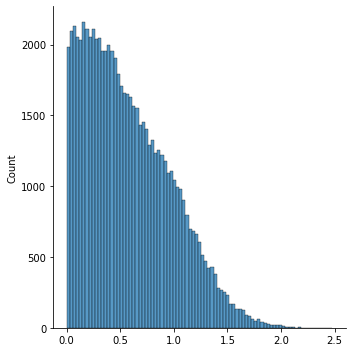

In [82]:
samples2 = sampler2(100000) 
sns.displot(samples2) 
plt.show()

Por fim, sabemos que a média amostral é um **estimador não-viesado e consistente** de $E(X^2)$.

 Logo:

In [83]:
#calculando a media amostral 
aproximacaoMC_esperanca = np.mean(samples2)
print(aproximacaoMC_esperanca)

0.5758152593785226


Portanto, $E(X^2) \approx 0.57$